# Trabalho 1 - Parte II

## Disciplina: Ciência de Dados (DCA-3501)

### Prof. Luiz Affonso Guedes

### Departamento de Engenharia de Computação e Automação - DCA UFRN - 2025

**Alunos**:
- João Pedro Araújo Ramalho
- Kiev Luiz Freitas Guedes

## Dataset

[Alzheimer's Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/)

# Análise Exploratória de Dados

## 1. Importando bibliotecas e configurações

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from typing import List
import warnings

In [ ]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

## 2. Visão geral do dataset


In [ ]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [ ]:
df.shape

(2149, 35)

In [ ]:
df.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0         142           72        242.366840   
1           0             0         115           64        231.162595   
2           0             0          99          116        284.181858   
3           0             0         118          115        159.582240   
4           0             0          94          117        237.602184   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0       56.150897       33.682563                162.189143  21.463532   
1      193.407996       79.028477                294.630909  20.613267   
2      153.322762       69.772292                 83.638324   7.356249   
3       65.366637       68.457491                277.577358  13.991127   
4       92.869700       56.874305                291.198780  13.517609   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696                 0                   0  2.592424   
2              5.895077                 0                   0  7.119548   
3              8.965106                 0                   1  6.481226   
4              6.045039                 0                   0  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis DoctorInCharge  
0              0          0      XXXConfid  
1              1          0      XXXConfid  
2              0          0      XXXConfid  
3              0          0      XXXConfid  
4              0          0      XXXConfid

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.describe().T

count        mean         std         min  \
Age                        2149.0   74.908795    8.990221   60.000000   
Gender                     2149.0    0.506282    0.500077    0.000000   
Ethnicity                  2149.0    0.697534    0.996128    0.000000   
EducationLevel             2149.0    1.286645    0.904527    0.000000   
BMI                        2149.0   27.655697    7.217438   15.008851   
Smoking                    2149.0    0.288506    0.453173    0.000000   
AlcoholConsumption         2149.0   10.039442    5.757910    0.002003   
PhysicalActivity           2149.0    4.920202    2.857191    0.003616   
DietQuality                2149.0    4.993138    2.909055    0.009385   
SleepQuality               2149.0    7.051081    1.763573    4.002629   
FamilyHistoryAlzheimers    2149.0    0.252210    0.434382    0.000000   
CardiovascularDisease      2149.0    0.144253    0.351428    0.000000   
Diabetes                   2149.0    0.150768    0.357906    0.000000   
Depression                 2149.0    0.200558    0.400511    0.000000   
HeadInjury                 2149.0    0.092601    0.289940    0.000000   
Hypertension               2149.0    0.148906    0.356079    0.000000   
SystolicBP                 2149.0  134.264774   25.949352   90.000000   
DiastolicBP                2149.0   89.847836   17.592496   60.000000   
CholesterolTotal           2149.0  225.197519   42.542233  150.093316   
CholesterolLDL             2149.0  124.335944   43.366584   50.230707   
CholesterolHDL             2149.0   59.463533   23.139174   20.003434   
CholesterolTriglycerides   2149.0  228.281496  101.986721   50.407194   
MMSE                       2149.0   14.755132    8.613151    0.005312   
FunctionalAssessment       2149.0    5.080055    2.892743    0.000460   
MemoryComplaints           2149.0    0.208004    0.405974    0.000000   
BehavioralProblems         2149.0    0.156817    0.363713    0.000000   
ADL                        2149.0    4.982958    2.949775    0.001288   
Confusion                  2149.0    0.205212    0.403950    0.000000   
Disorientation             2149.0    0.158213    0.365026    0.000000   
PersonalityChanges         2149.0    0.150768    0.357906    0.000000   
DifficultyCompletingTasks  2149.0    0.158678    0.365461    0.000000   
Forgetfulness              2149.0    0.301536    0.459032    0.000000   
Diagnosis                  2149.0    0.353653    0.478214    0.000000   

                                  25%         50%         75%         max  
Age                         67.000000   75.000000   83.000000   90.000000  
Gender                       0.000000    1.000000    1.000000    1.000000  
Ethnicity                    0.000000    0.000000    1.000000    3.000000  
EducationLevel               1.000000    1.000000    2.000000    3.000000  
BMI                         21.611408   27.823924   33.869778   39.992767  
Smoking                      0.000000    0.000000    1.000000    1.000000  
AlcoholConsumption           5.139810    9.934412   15.157931   19.989293  
PhysicalActivity             2.570626    4.766424    7.427899    9.987429  
DietQuality                  2.458455    5.076087    7.558625    9.998346  
SleepQuality                 5.482997    7.115646    8.562521    9.999840  
FamilyHistoryAlzheimers      0.000000    0.000000    1.000000    1.000000  
CardiovascularDisease        0.000000    0.000000    0.000000    1.000000  
Diabetes                     0.000000    0.000000    0.000000    1.000000  
Depression                   0.000000    0.000000    0.000000    1.000000  
HeadInjury                   0.000000    0.000000    0.000000    1.000000  
Hypertension                 0.000000    0.000000    0.000000    1.000000  
SystolicBP                 112.000000  134.000000  157.000000  179.000000  
DiastolicBP                 74.000000   91.000000  105.000000  119.000000  
CholesterolTotal           190.252963  225.086430  262.031657  299.993352  
CholesterolLDL           

In [ ]:
for column in df.columns:
    print(f"Valores NaN na coluna {column}: {df[column].isna().unique()}")

Valores NaN na coluna Age: [False]
Valores NaN na coluna Gender: [False]
Valores NaN na coluna Ethnicity: [False]
Valores NaN na coluna EducationLevel: [False]
Valores NaN na coluna BMI: [False]
Valores NaN na coluna Smoking: [False]
Valores NaN na coluna AlcoholConsumption: [False]
Valores NaN na coluna PhysicalActivity: [False]
Valores NaN na coluna DietQuality: [False]
Valores NaN na coluna SleepQuality: [False]
Valores NaN na coluna FamilyHistoryAlzheimers: [False]
Valores NaN na coluna CardiovascularDisease: [False]
Valores NaN na coluna Diabetes: [False]
Valores NaN na coluna Depression: [False]
Valores NaN na coluna HeadInjury: [False]
Valores NaN na coluna Hypertension: [False]
Valores NaN na coluna SystolicBP: [False]
Valores NaN na coluna DiastolicBP: [False]
Valores NaN na coluna CholesterolTotal: [False]
Valores NaN na coluna CholesterolLDL: [False]
Valores NaN na coluna CholesterolHDL: [False]
Valores NaN na coluna CholesterolTriglycerides: [False]
Valores NaN na coluna MM

In [ ]:
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

### Obs:
- O dataset não possui valores faltando
- Foram retiradas as colunas _PatientId_ e _DoctorInCharge_ para a análise exploratória.

### Definindo funções de plotagem

In [ ]:
def config_ax(*, title: str, xlabel: str, ax: plt.Axes, xticks: List[str] = None, show_hue: bool = True):
  if show_hue:
    ax.legend(title='Diagnosis', labels=['Sem Alzheimer', 'Com Alzheimer'])
  ax.set_title(title)
  ax.set_xlabel(xlabel)

  if xticks:
    ax.set_xticks(range(len(xticks)), xticks, rotation="horizontal")

def proportion_plot(*, _df: pd.DataFrame, x:str, hue:str, title: str, xlabel:str, xticks: List[str], ax: plt.Axes):
  n_classes = pd.crosstab(_df[x], _df[hue]).shape[1]

  colors = sns.color_palette('Set2', n_classes)

  crosstab = pd.crosstab(_df[x], _df[hue], normalize='index') * 100
  ax_ = crosstab.plot(kind='bar', stacked=True, ax=ax, color=colors)

  for bars in ax_.containers:
      for bar in bars:
          height = bar.get_height()
          if height > 0:
              ax_.text(
                  bar.get_x() + bar.get_width() / 2,
                  bar.get_y() + height / 2,
                  f'{height:.1f}%',
                  ha='center', va='center', fontsize=14, color='white'
              )

  config_ax(title=title, xlabel=xlabel, xticks=xticks, ax=ax)

def count_plot(*, _df: pd.DataFrame, x:str, hue:str, title: str, xlabel:str, xticks: List[str], ax: plt.Axes):
  sns.countplot(data=_df, x=x, hue=hue, ax=ax, palette=sns.color_palette('Set2'))
  config_ax(title=title, xlabel=xlabel, xticks=xticks, ax=ax)

  for container in ax.containers:
      ax.bar_label(container, fmt="%.d")

def violin_plot(*, _df: pd.DataFrame, x: str, y: str, title: str, xlabel: str, xticks: List[str], ax: plt.Axes):
  sns.violinplot(data=_df, x=x, y=y, ax=ax, palette=sns.color_palette('Set2'))
  config_ax(title=title, xlabel=xlabel, xticks=xticks, ax=ax, show_hue=False)

def box_plot(*, _df: pd.DataFrame, x: str, y: str, title: str, xlabel: str, xticks: List[str], ax: plt.Axes):
  sns.boxplot(data=_df, x=x, y=y, ax=ax, palette=sns.color_palette('Set2'))
  config_ax(title=title, xlabel=xlabel, xticks=xticks, ax=ax, show_hue=False)

def hist_plot(*, _df: pd.DataFrame, x: str, title: str, xlabel: str, ax: plt.Axes, kde: bool = True, hue: str=None, stat="count"):
  sns.histplot(data=_df, x=x, hue=hue, ax=ax, kde=kde, palette=sns.color_palette('Set2'), stat=stat)
  config_ax(title=title, xlabel=xlabel, ax=ax, show_hue=False)

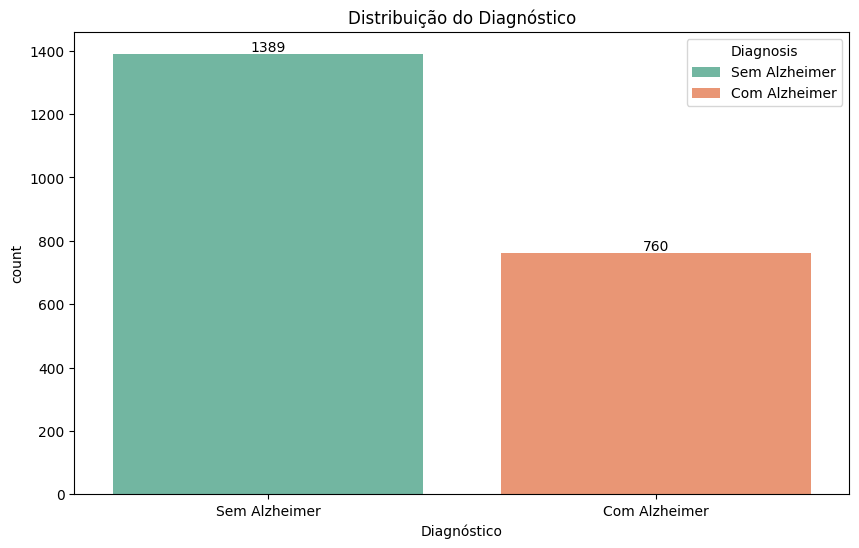

In [ ]:
count_plot(
    _df=df,
    x='Diagnosis',
    hue=None,
    title='Distribuição do Diagnóstico',
    xlabel='Diagnóstico',
    xticks=["Sem Alzheimer", "Com Alzheimer"],
    ax=plt.gca()
)

### Obs:
- No dataset, 35% dos paciente possuem Alzheimer

## 3. Análise exploratória

### Perguntas
- Qual é a associação entre idade e a probabilidade de diagnóstico de Alzheimer?
- Há diferença na incidência de Alzheimer entre homens e mulheres?
- O risco de Alzheimer varia entre diferentes grupos étnicos?
- Existe relação entre o nível de escolaridade e a ocorrência de Alzheimer?
- Fatores como tabagismo, consumo de álcool, dieta, atividade física e qualidade do sono influenciam o risco de Alzheimer?
- A presença de hipertensão, diabetes, doenças cardiovasculares ou histórico familiar está associada a um maior risco de Alzheimer?
- Quais sintomas (como esquecimento, desorientação, confusão, mudanças de personalidade e dificuldade em completar tarefas) estão mais fortemente associados ao diagnóstico de Alzheimer?
- Qual é a diferença nos escores de MMSE entre pacientes com e sem Alzheimer?
- Pacientes com Alzheimer apresentam escores mais baixos de ADL ou FunctionalAssessment?
- O nível de escolaridade ou a idade influenciam os escores de MMSE?
- A presença de depressão ou histórico de lesão na cabeça está associada a menor desempenho cognitivo ou maior risco de Alzheimer?
- Como as reclamações de memória e problemas comportamentais estão associados ao Alzheimer?

### Mapa de correlação

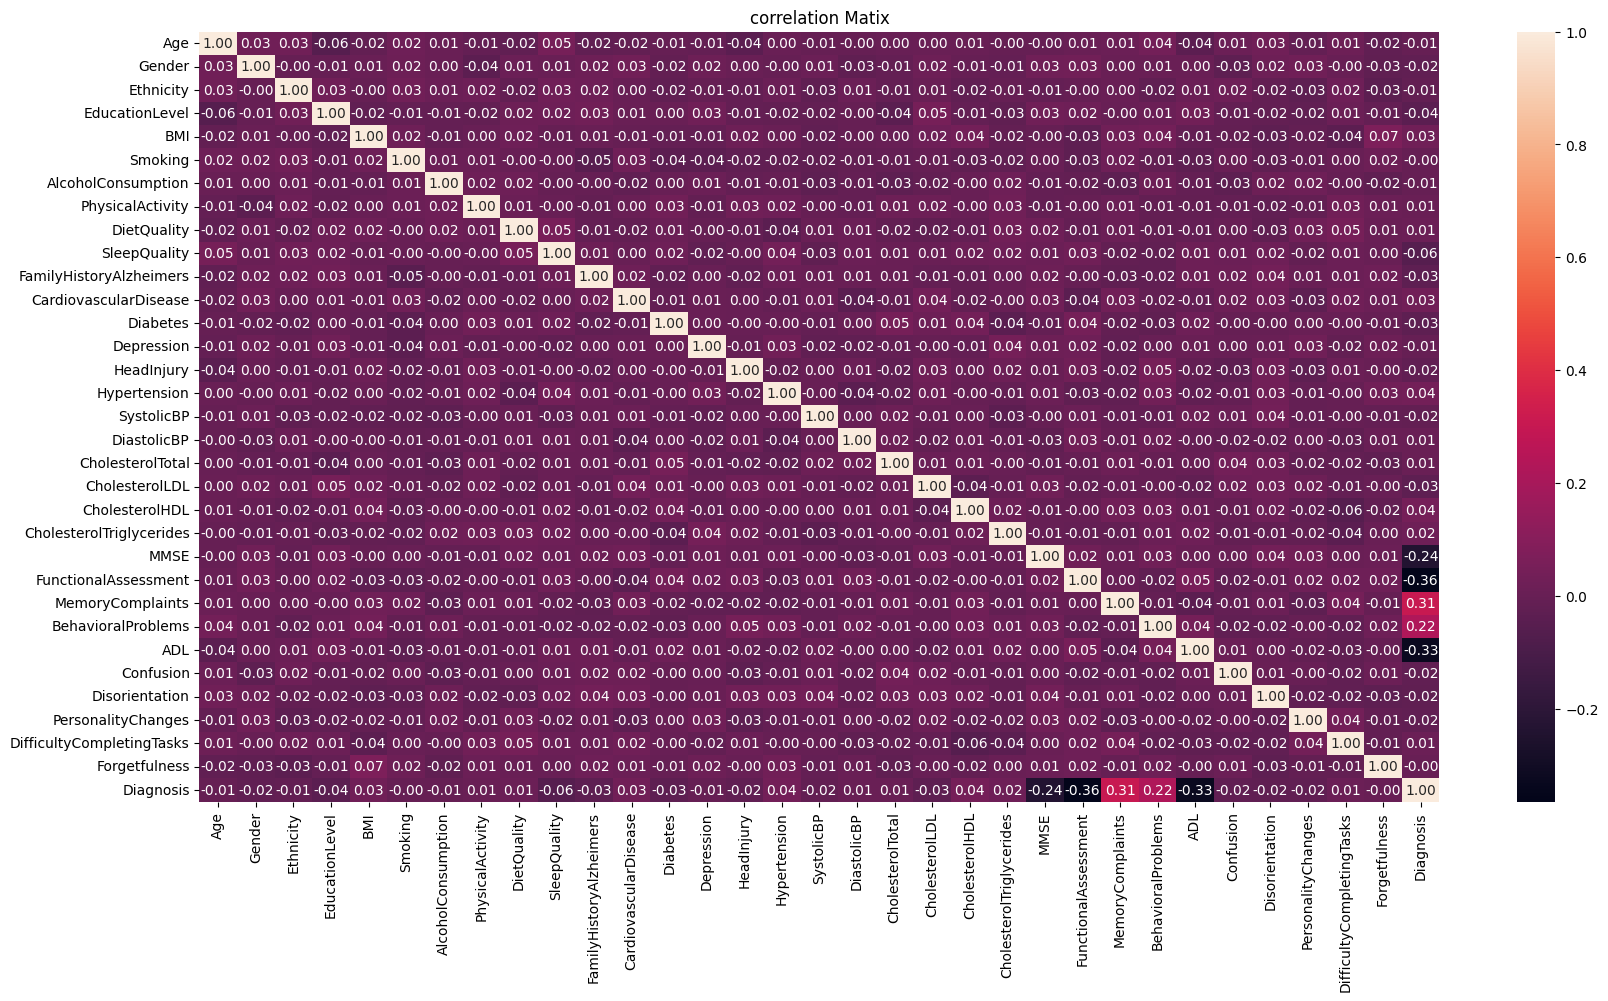

In [ ]:
plt.figure(figsize=(20, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("correlation Matix")
plt.show()

**Obs**:
- A maior parte das variáveis não apresentam correlação significativa.
- O diagnóstico de Alzheimer está associado apenas às variáveis relacionadas a avaliação cognitiva e funcional:
  - MMSE
  - Functional Assessment
  - MemoryComplaints
  - Behavioral Problems
  - ADL

### Qual é a associação entre idade e a probabilidade de diagnóstico de Alzheimer?

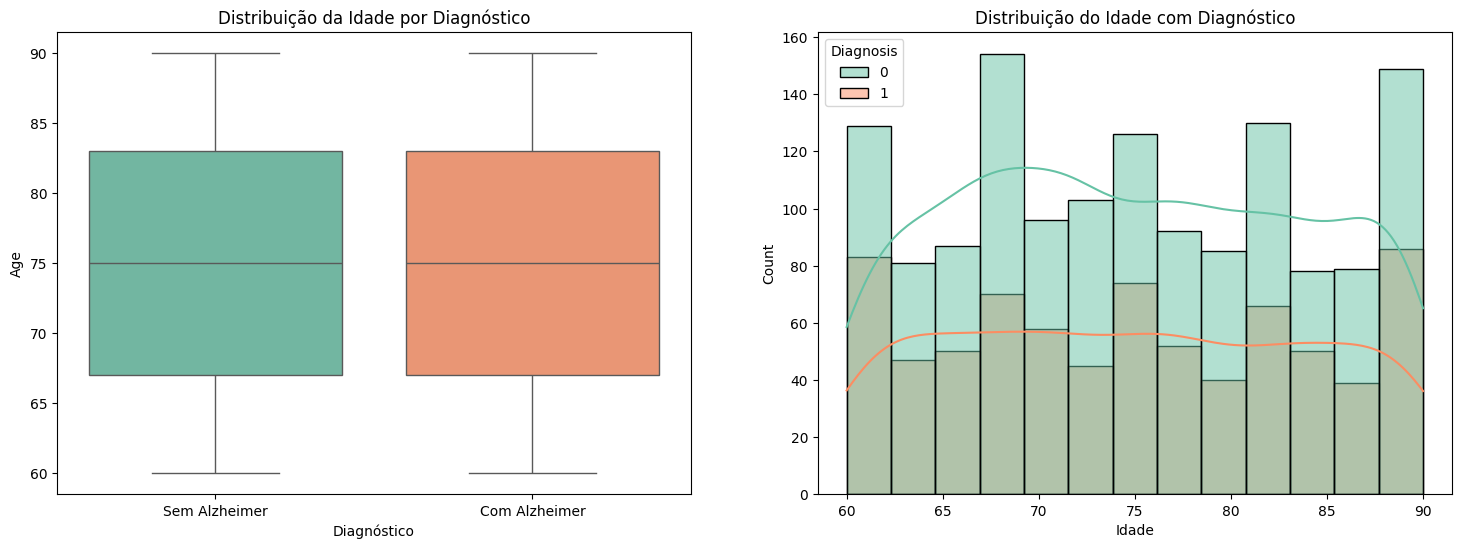

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
box_plot(
    _df=df,
    x='Diagnosis',
    y='Age',
    title='Distribuição da Idade por Diagnóstico',
    xlabel='Diagnóstico',
    xticks=["Sem Alzheimer", "Com Alzheimer"],
    ax=ax[0]
)

hist_plot(
    _df=df,
    x='Age',
    hue="Diagnosis",
    title='Distribuição do Idade com Diagnóstico',
    xlabel='Idade',
    ax=ax[1],
    stat="count"
)

**Obs**:
- A idade não parece ser um fator discriminantes para o Alzheimer, visto que a distribuição é homogênia na faixas de 60 a 90 anos.
- Mesma mediana e intervalo interquartis nos grupos sem e com Alzheimer.

### Há diferença na incidência de Alzheimer entre homens e mulheres?

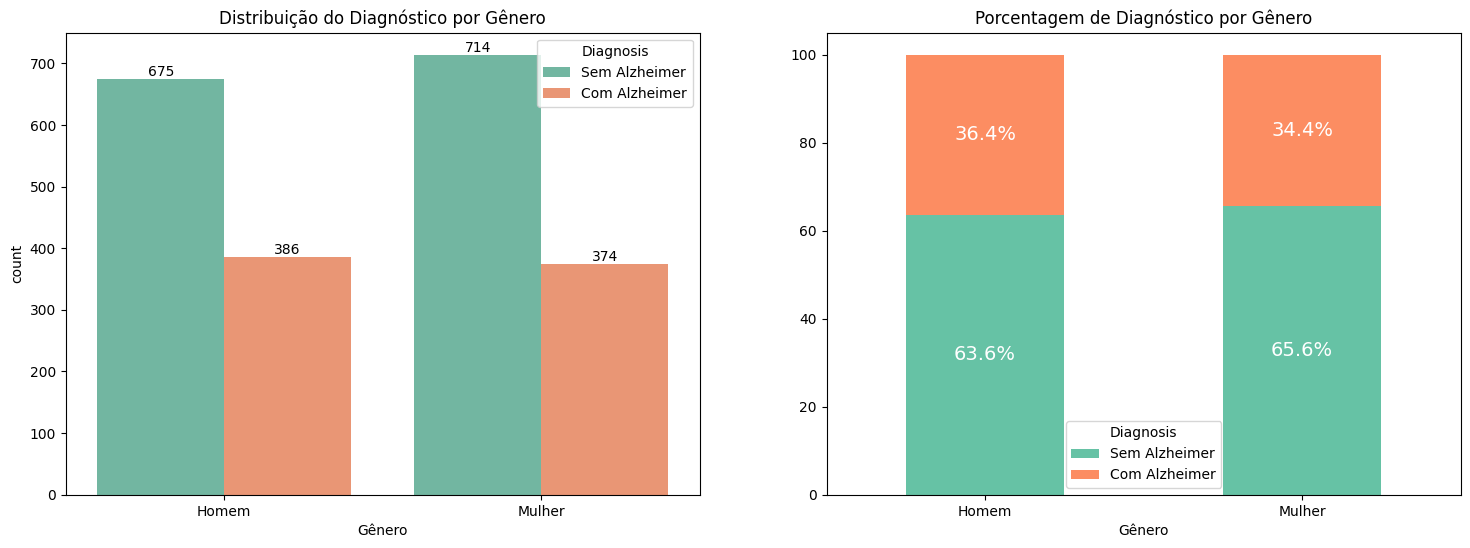

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

count_plot(
    _df=df,
    x='Gender',
    hue='Diagnosis',
    title='Distribuição do Diagnóstico por Gênero',
    xlabel='Gênero',
    xticks=['Homem', 'Mulher'],
    ax=ax[0]
)

proportion_plot(
    _df=df,
    x='Gender',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Gênero',
    xlabel='Gênero',
    xticks=['Homem', 'Mulher'],
    ax=ax[1]
)

**Obs**:
- As proporções no disgnótico da doença considerando o gênero do paciente são similares.
- O gênero não é um fator discriminante.

### O risco de Alzheimer varia entre diferentes grupos étnicos?

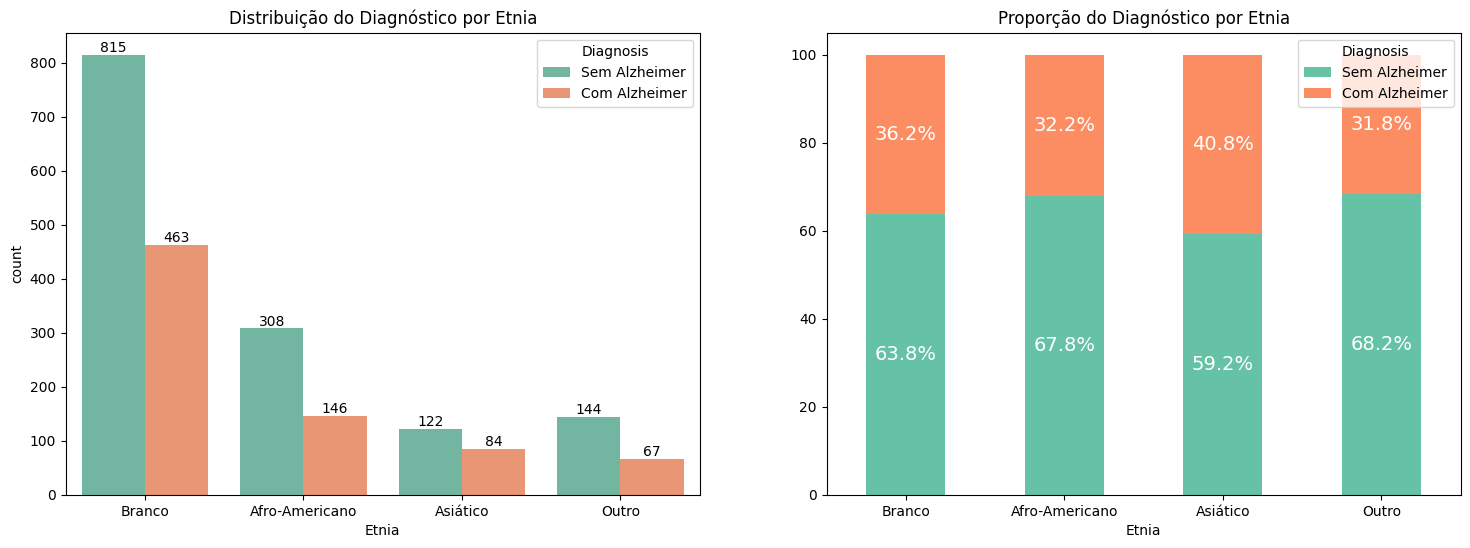

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

count_plot(
    _df=df,
    x='Ethnicity',
    hue='Diagnosis',
    title='Distribuição do Diagnóstico por Etnia',
    xticks=["Branco", "Afro-Americano", "Asiático", "Outro"],
    xlabel='Etnia',
    ax=ax[0],
)

proportion_plot(
    _df=df,
    x='Ethnicity',
    hue='Diagnosis',
    title='Proporção do Diagnóstico por Etnia',
    xticks=["Branco", "Afro-Americano", "Asiático", "Outro"],
    xlabel='Etnia',
    ax=ax[1],
)

**Obs**:
- A distribuição de grupos étnicos é irregular.
- A proporção de pacientes com Alzheimer para os diferentes grupos étnicos é similar, o que indica que essa variável não é discriminante.

### Existe relação entre o nível de escolaridade e a ocorrência de Alzheimer?

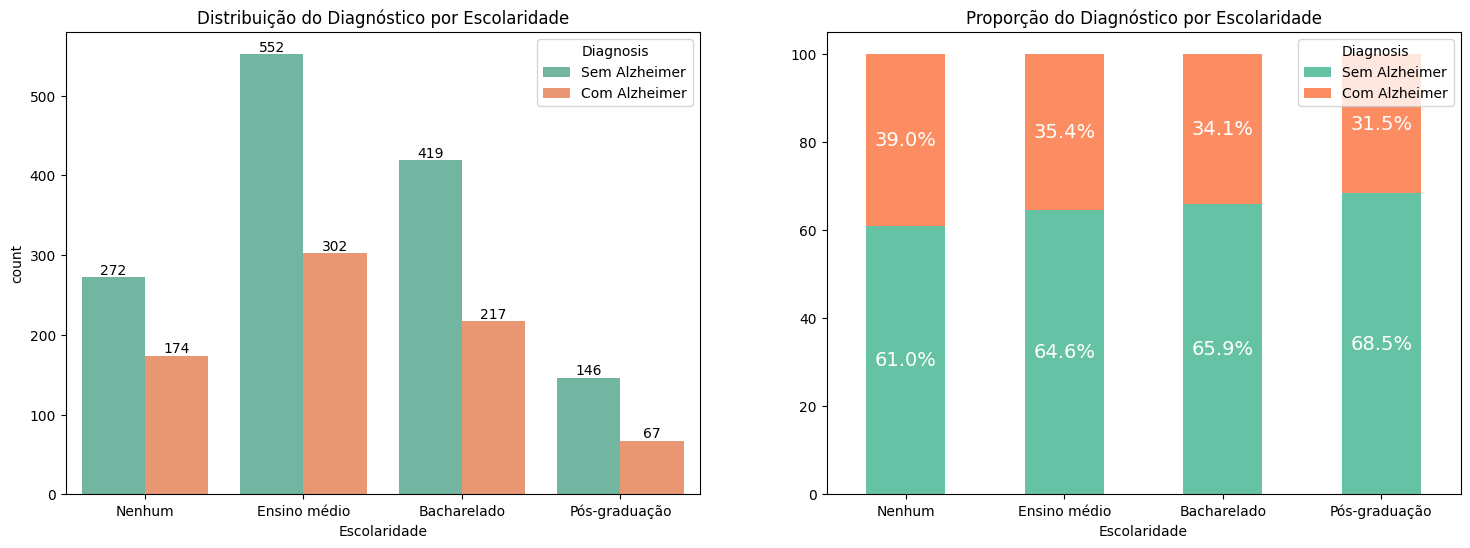

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

count_plot(
    _df=df,
    x='EducationLevel',
    hue='Diagnosis',
    title='Distribuição do Diagnóstico por Escolaridade',
    xticks=["Nenhum", "Ensino médio", "Bacharelado", "Pós-graduação"],
    xlabel='Escolaridade',
    ax=ax[0],
)

proportion_plot(
    _df=df,
    x='EducationLevel',
    hue='Diagnosis',
    title='Proporção do Diagnóstico por Escolaridade',
    xticks=["Nenhum", "Ensino médio", "Bacharelado", "Pós-graduação"],
    xlabel='Escolaridade',
    ax=ax[1],
)

**Obs**:
- A distribuição de acordo com a escolaidade é irregular.
- A proporção de pacientes com Alzheimer com diferentes escolaridades é similar, o que indica que essa variável não é discriminante.
- No entanto, nota-se uma LEVE diminuição no diagnóstico de Alzheimer com o aumento da escolaridade.

### Fatores como tabagismo, consumo de álcool, dieta, atividade física e qualidade do sono influenciam o risco de Alzheimer?

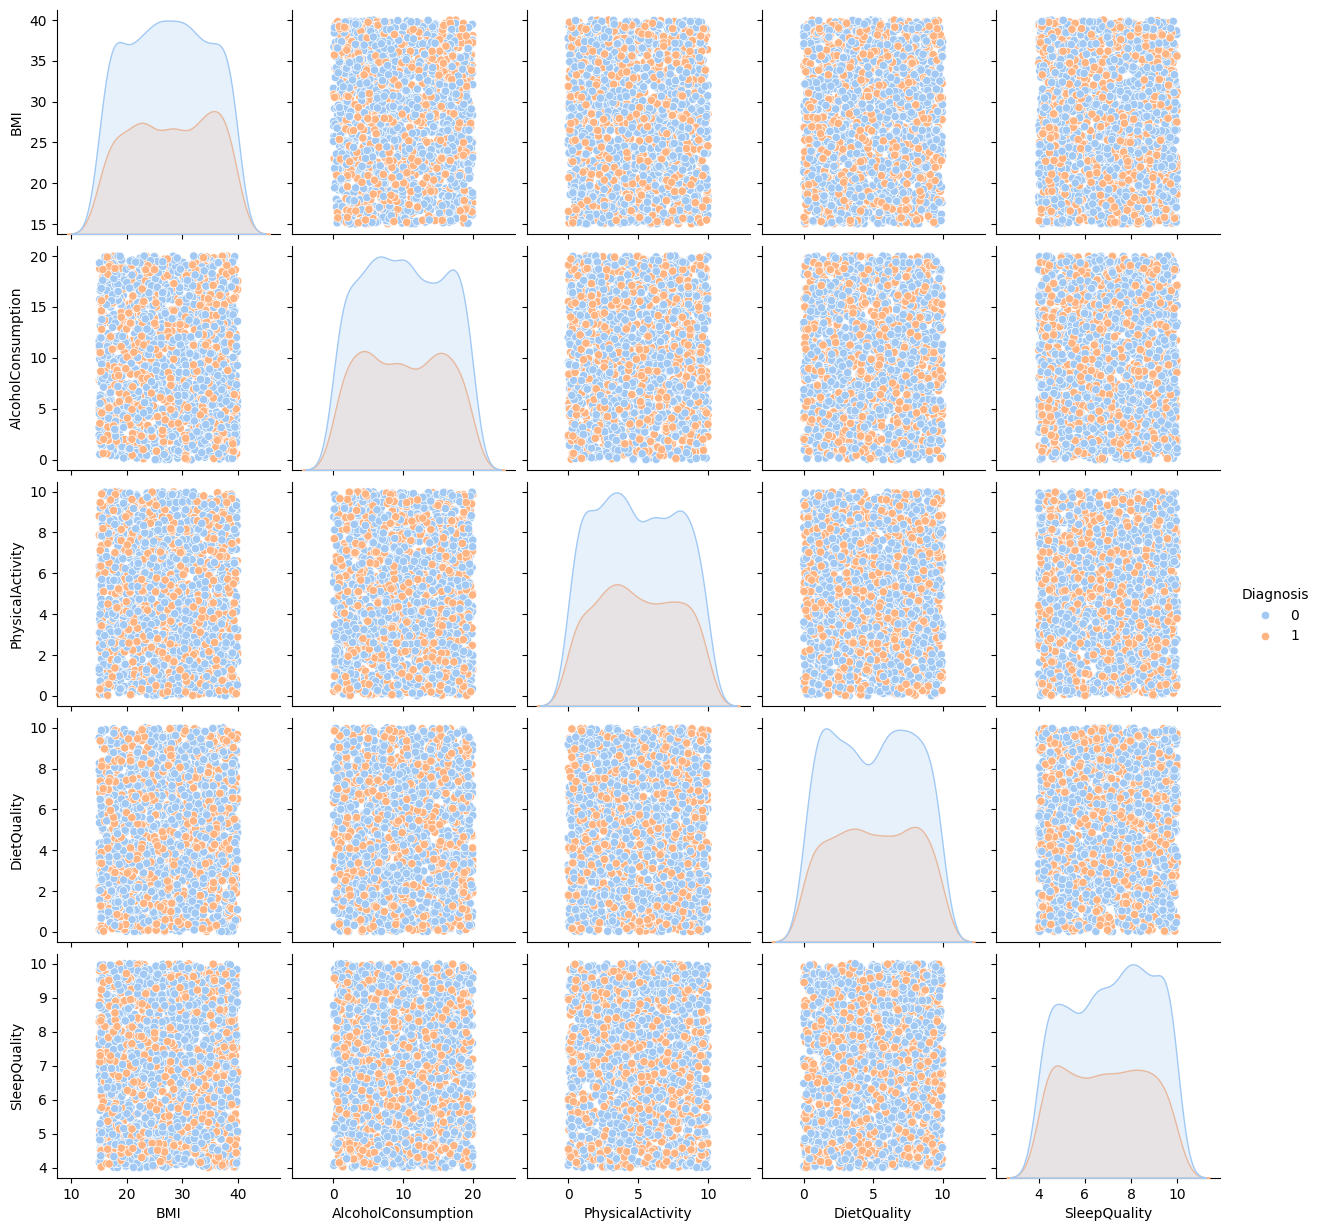

In [ ]:
sns.pairplot(
    data=df,
    vars=['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality'],
    hue='Diagnosis',
    palette='pastel',
    diag_kind='kde'
)

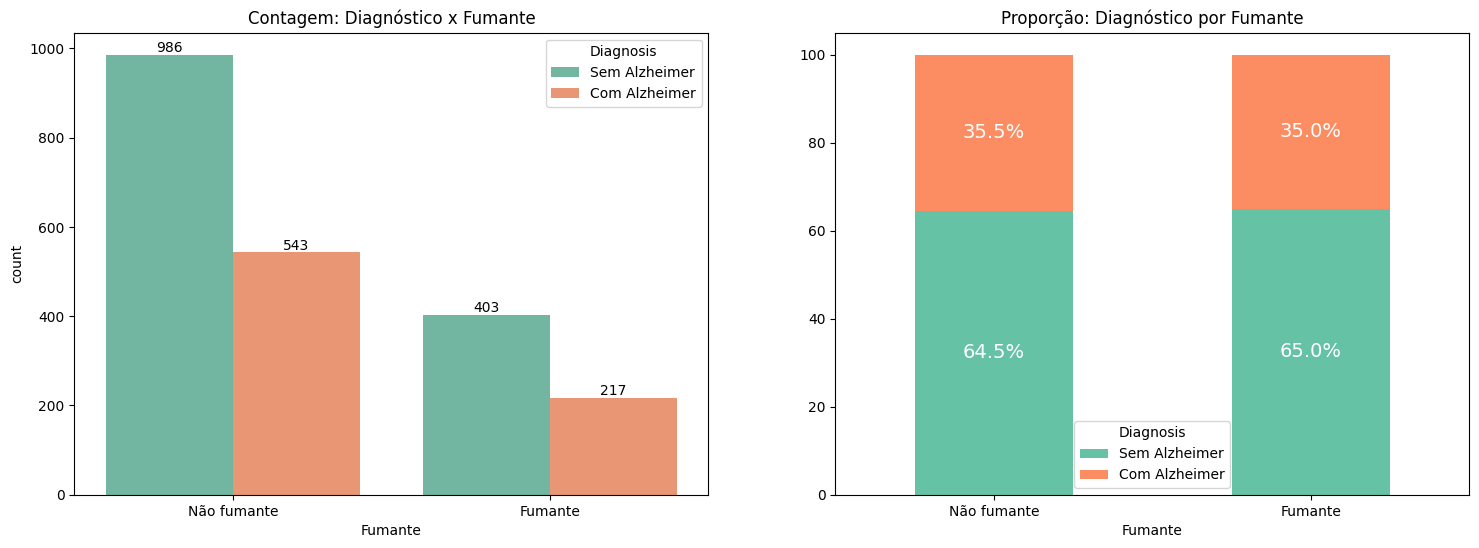

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

count_plot(
    _df=df,
     x='Smoking',
    hue='Diagnosis',
    title='Contagem: Diagnóstico x Fumante',
    xticks=["Não fumante", "Fumante"],
    xlabel='Fumante',
    ax=ax[0],
)

proportion_plot(
    _df=df,
    x='Smoking',
    hue='Diagnosis',
    title='Proporção: Diagnóstico por Fumante',
    xticks=["Não fumante", "Fumante"],
    xlabel='Fumante',
    ax=ax[1],
)

**Obs**:
- Não podemos afirmar que há relação entre o estilo de vida e o desenvolvimento de Alzheimer.
- A disperção entre as variáveis é homogênia.
- Dos pacientes que não possuem Alzheimer, a densidade de probabilidade é consideravelmente maior para uma melhor qualidade de sono.
- Não há indícios que o tabagismo influencie no desenvolvimento de Alzheimer

### A presença de hipertensão, diabetes, doenças cardiovasculares ou histórico familiar está associada a um maior risco de Alzheimer?

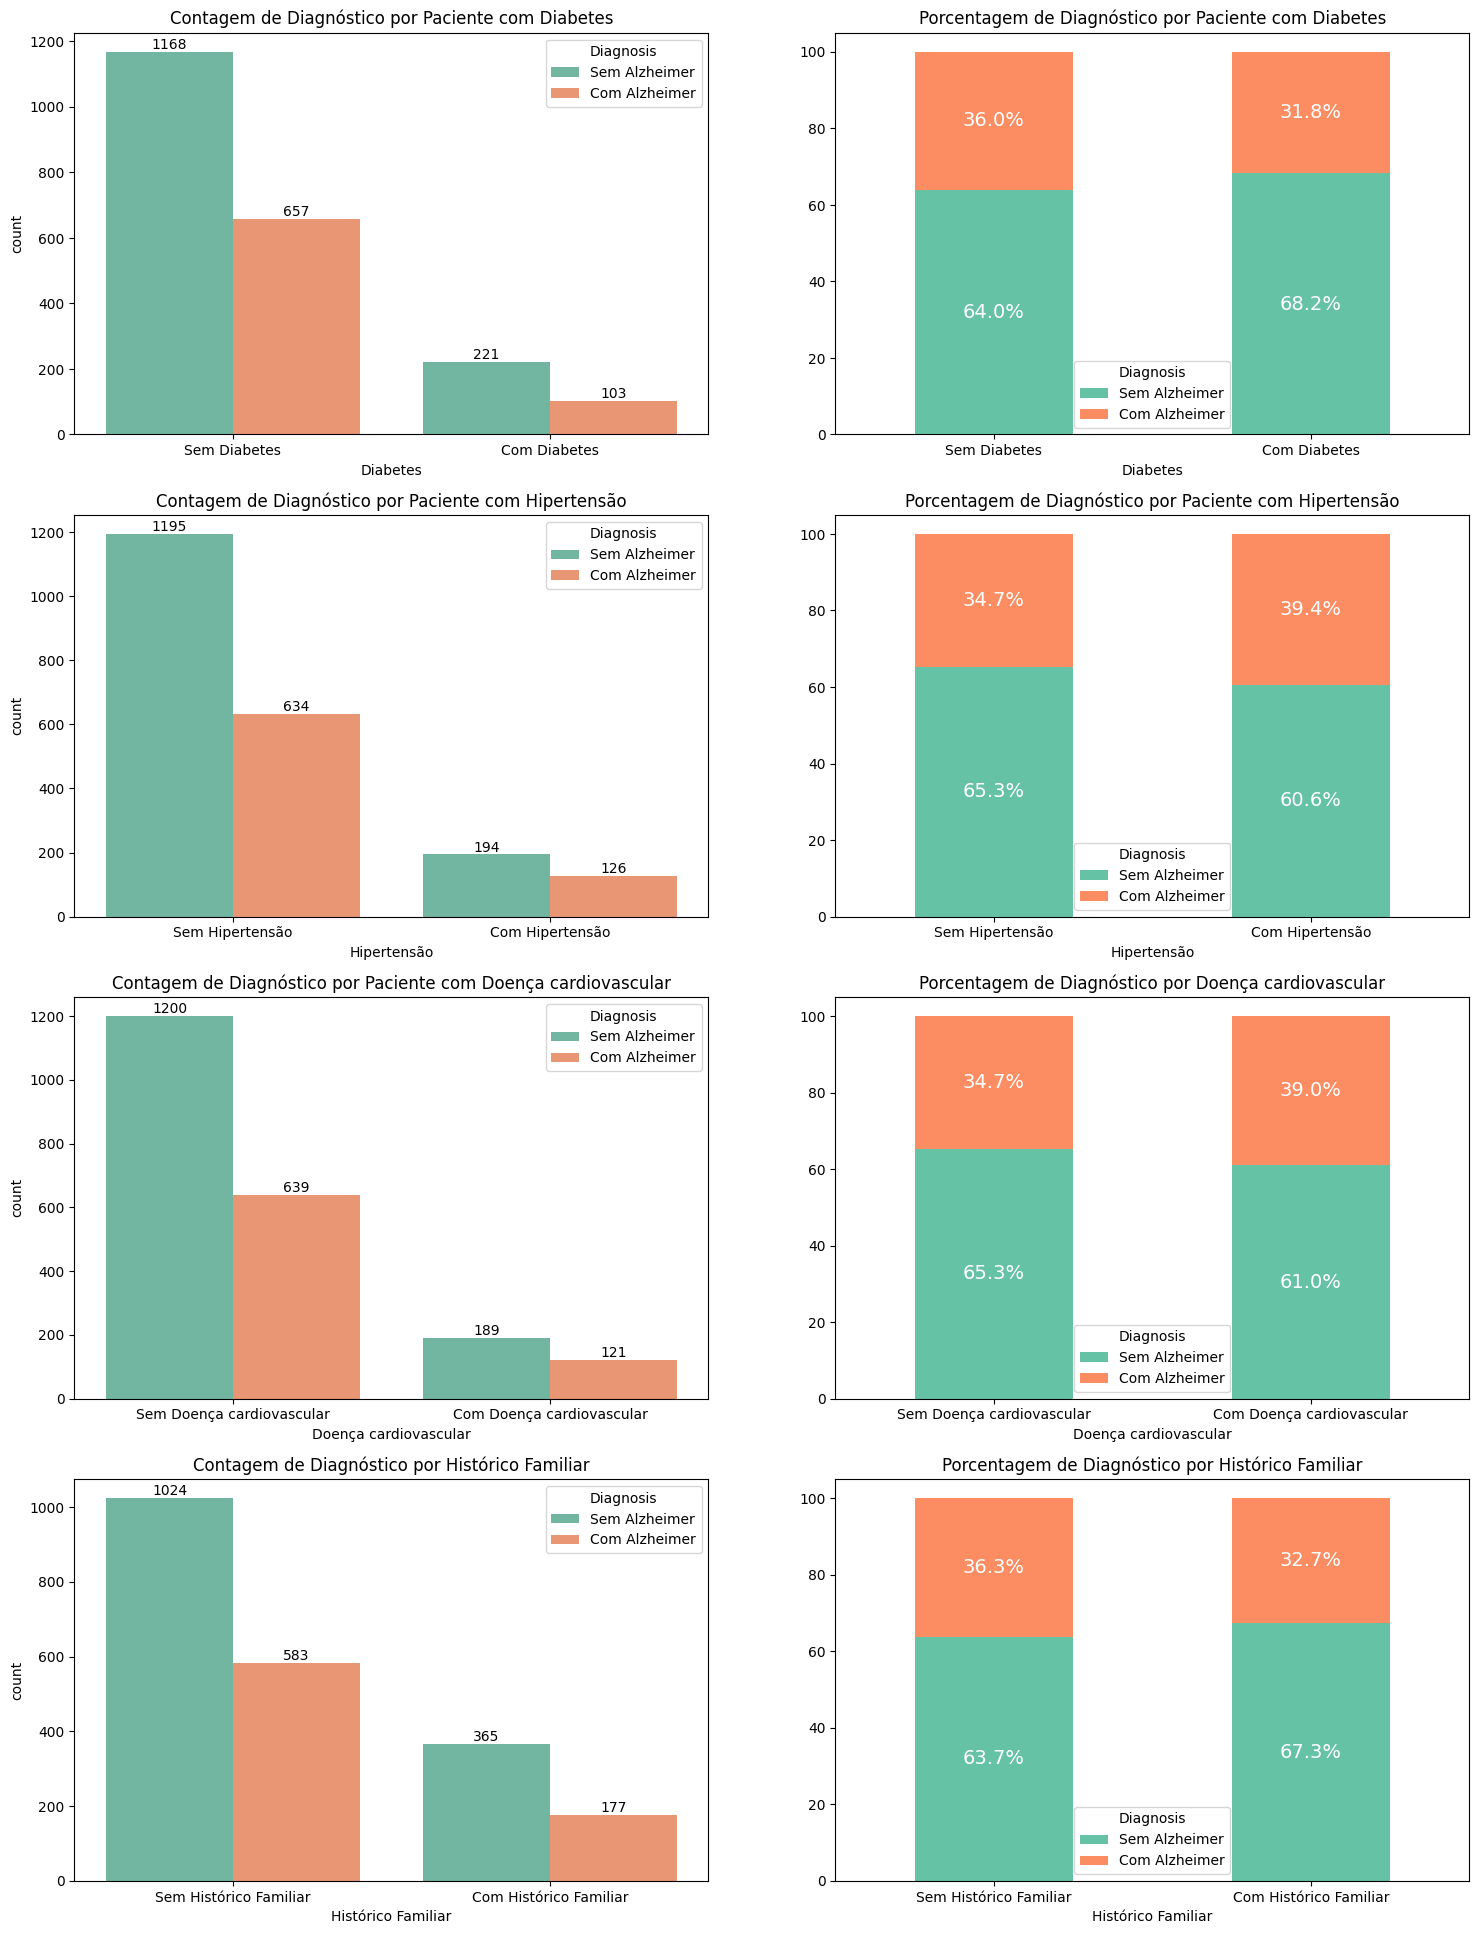

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(18,24))

count_plot(
    _df=df,
    x='Diabetes',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Paciente com Diabetes',
    xlabel='Diabetes',
    xticks=['Sem Diabetes', 'Com Diabetes'],
    ax=ax[0,0]
)

proportion_plot(
    _df=df,
    x='Diabetes',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Paciente com Diabetes',
    xlabel='Diabetes',
    xticks=['Sem Diabetes', 'Com Diabetes'],
    ax=ax[0,1]
)

count_plot(
    _df=df,
    x='Hypertension',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Paciente com Hipertensão',
    xlabel='Hipertensão',
    xticks=['Sem Hipertensão', 'Com Hipertensão'],
    ax=ax[1,0]
)

proportion_plot(
    _df=df,
    x='Hypertension',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Paciente com Hipertensão',
    xlabel='Hipertensão',
    xticks=['Sem Hipertensão', 'Com Hipertensão'],
    ax=ax[1,1]
)

count_plot(
    _df=df,
    x='CardiovascularDisease',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Paciente com Doença cardiovascular',
    xlabel='Doença cardiovascular',
    xticks=['Sem Doença cardiovascular', 'Com Doença cardiovascular'],
    ax=ax[2,0]
)

proportion_plot(
    _df=df,
    x='CardiovascularDisease',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Doença cardiovascular',
    xlabel='Doença cardiovascular',
    xticks=['Sem Doença cardiovascular', 'Com Doença cardiovascular'],
    ax=ax[2,1]
)

count_plot(
    _df=df,
    x='FamilyHistoryAlzheimers',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Histórico Familiar',
    xlabel='Histórico Familiar',
    xticks=['Sem Histórico Familiar', 'Com Histórico Familiar'],
    ax=ax[3,0]
)

proportion_plot(
    _df=df,
    x='FamilyHistoryAlzheimers',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Histórico Familiar',
    xlabel='Histórico Familiar',
    xticks=['Sem Histórico Familiar', 'Com Histórico Familiar'],
    ax=ax[3,1]
)

**Obs**:
- Não é possível afirmar que a hipertensão, a diabetes, o histórico familiar de Alzheimer ou os problemas cardiovasculares estejam relacionadas com o Alzheimer, dado que, apesar de possuirem amostras distorcidas, a proporção é similar.

### Quais sintomas (como desorientação, confusão, mudanças de personalidade e dificuldade em completar tarefas) estão mais fortemente associados ao diagnóstico de Alzheimer?

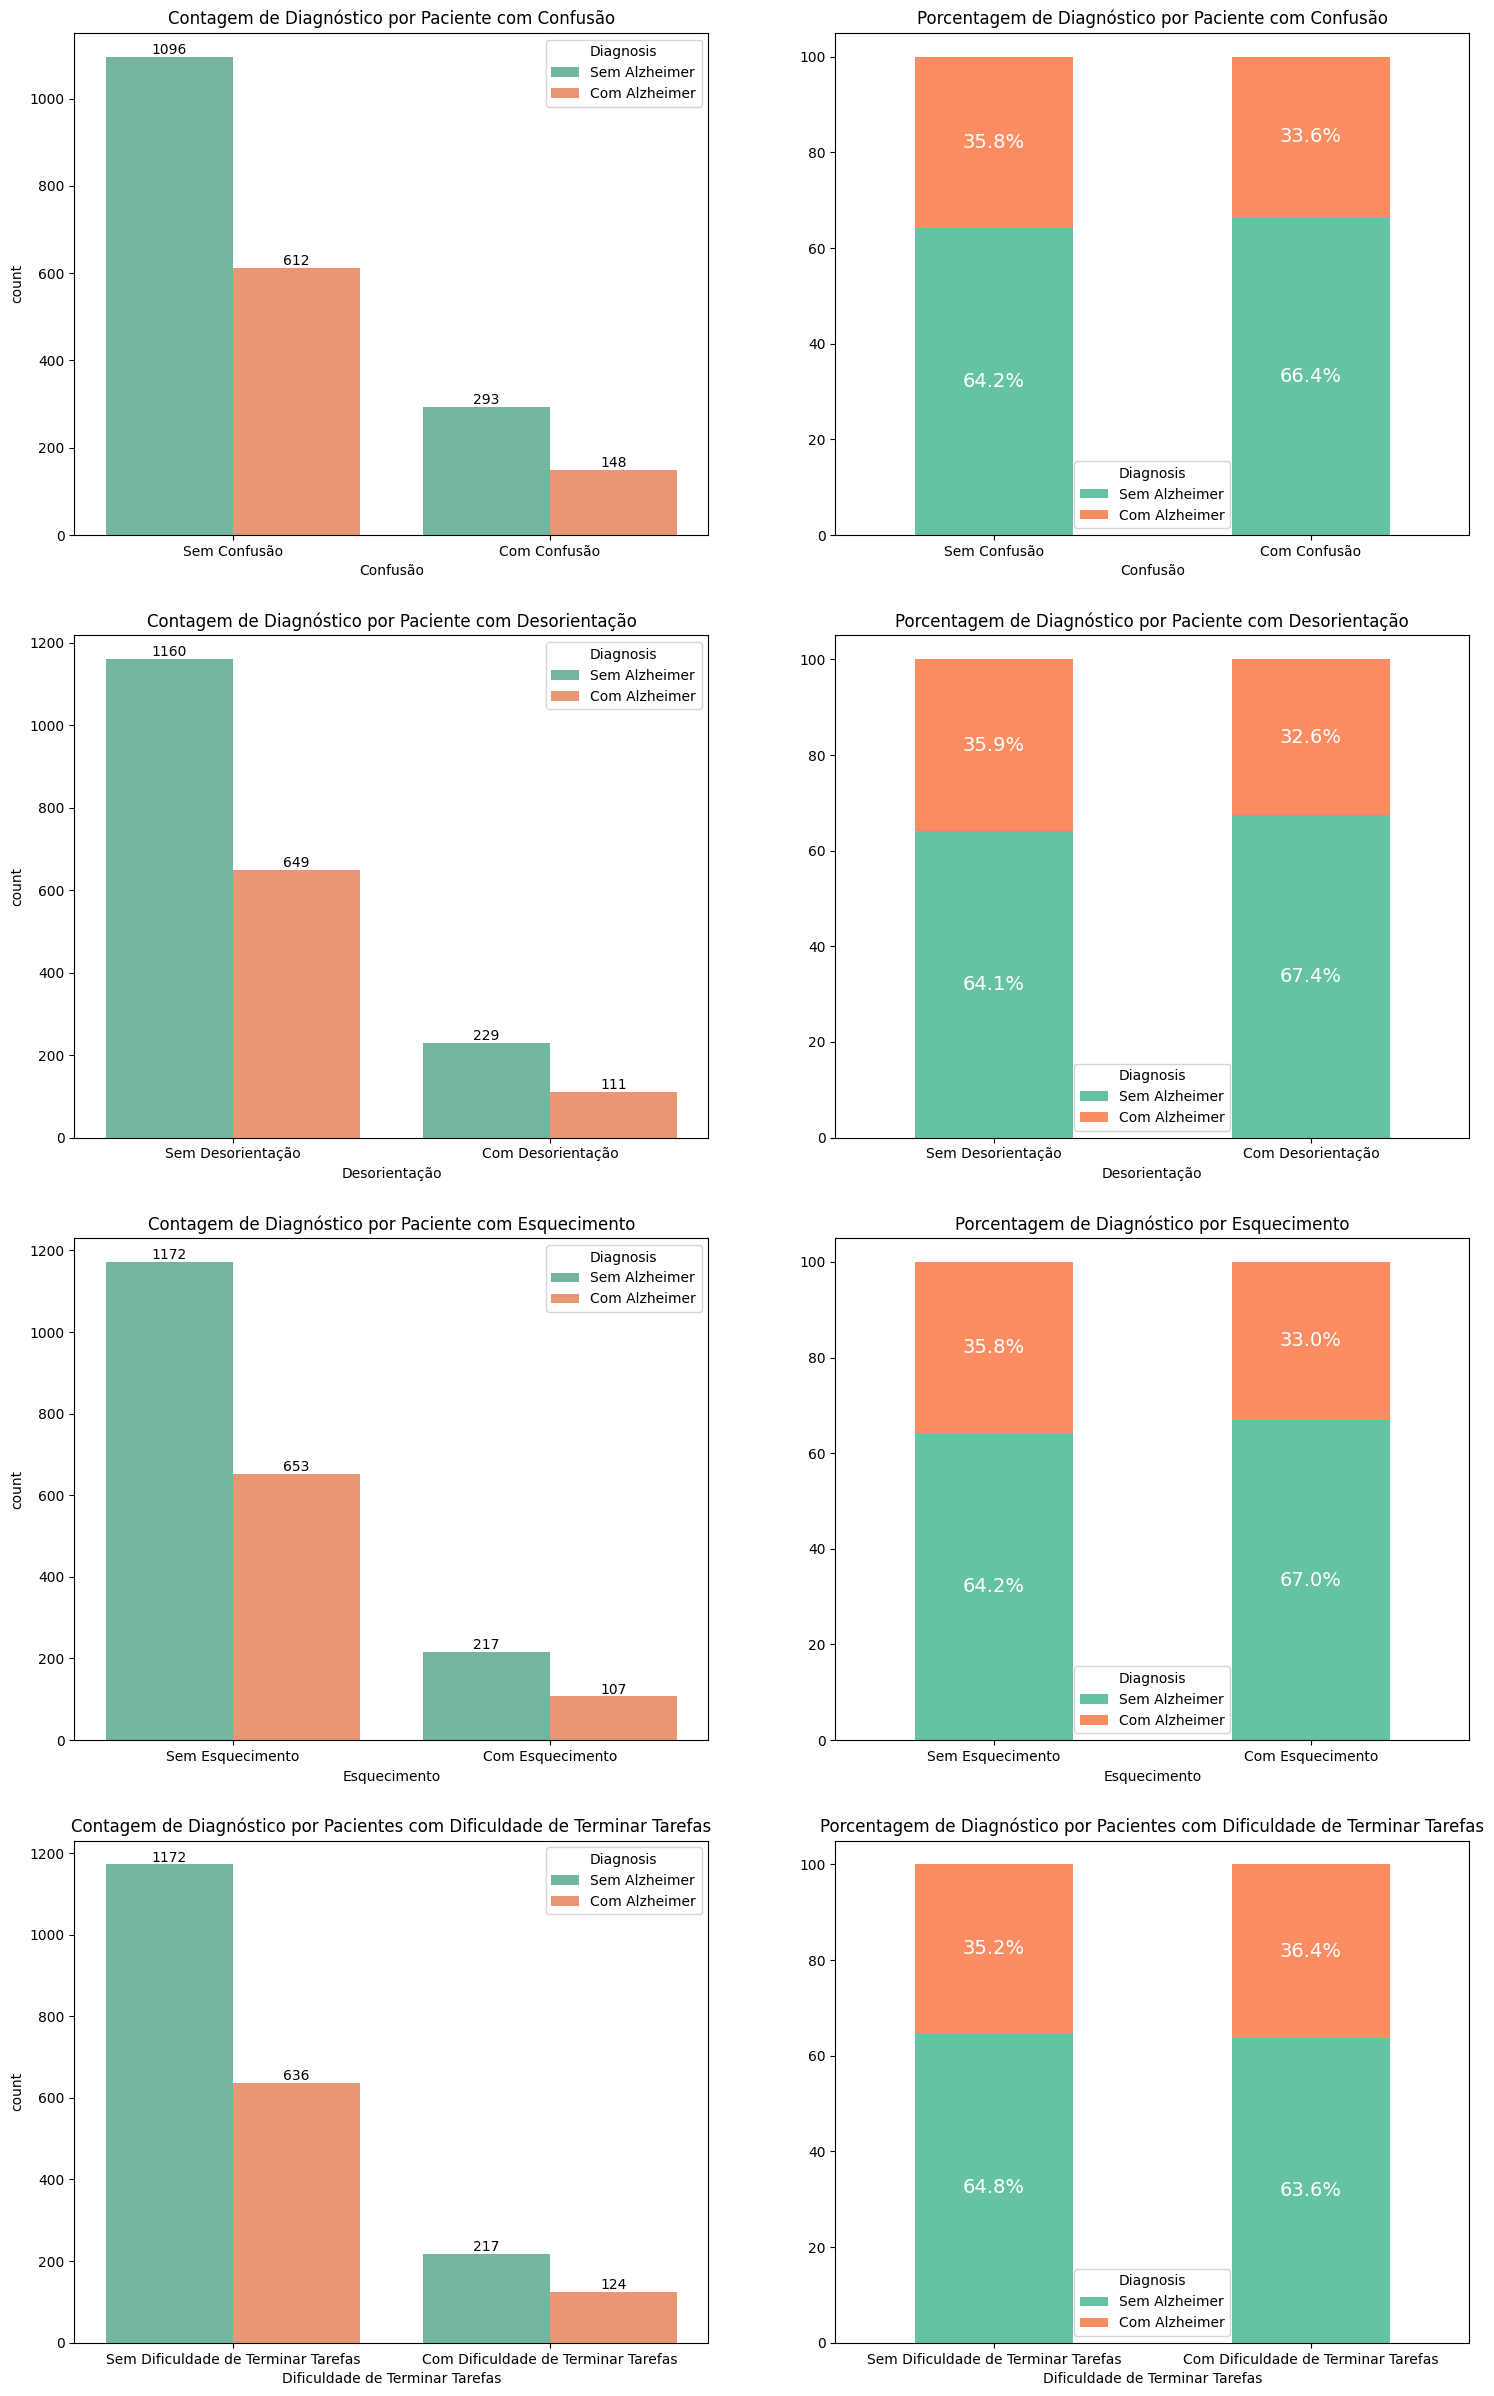

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(18,30))

count_plot(
    _df=df,
    x='Confusion',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Paciente com Confusão',
    xlabel='Confusão',
    xticks=['Sem Confusão', 'Com Confusão'],
    ax=ax[0,0]
)

proportion_plot(
    _df=df,
    x='Confusion',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Paciente com Confusão',
    xlabel='Confusão',
    xticks=['Sem Confusão', 'Com Confusão'],
    ax=ax[0,1]
)

count_plot(
    _df=df,
    x='Disorientation',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Paciente com Desorientação',
    xlabel='Desorientação',
    xticks=['Sem Desorientação', 'Com Desorientação'],
    ax=ax[1,0]
)

proportion_plot(
    _df=df,
    x='Disorientation',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Paciente com Desorientação',
    xlabel='Desorientação',
    xticks=['Sem Desorientação', 'Com Desorientação'],
    ax=ax[1,1]
)

count_plot(
    _df=df,
    x='PersonalityChanges',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Paciente com Esquecimento',
    xlabel='Esquecimento',
    xticks=['Sem Esquecimento', 'Com Esquecimento'],
    ax=ax[2,0]
)

proportion_plot(
    _df=df,
    x='PersonalityChanges',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Esquecimento',
    xlabel='Esquecimento',
    xticks=['Sem Esquecimento', 'Com Esquecimento'],
    ax=ax[2,1]
)

count_plot(
    _df=df,
    x='DifficultyCompletingTasks',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Pacientes com Dificuldade de Terminar Tarefas',
    xlabel='Dificuldade de Terminar Tarefas',
    xticks=['Sem Dificuldade de Terminar Tarefas', 'Com Dificuldade de Terminar Tarefas'],
    ax=ax[3,0]
)

proportion_plot(
    _df=df,
    x='DifficultyCompletingTasks',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Pacientes com Dificuldade de Terminar Tarefas',
    xlabel='Dificuldade de Terminar Tarefas',
    xticks=['Sem Dificuldade de Terminar Tarefas', 'Com Dificuldade de Terminar Tarefas'],
    ax=ax[3,1]
)

**Obs**:
- Não há variação de sintomas entre as pessoas com e sem Alzheimer, segundo o dataset.
- Também não é possível destacar um quadro de sintomas padrão para o Alzheimer.

### Qual é a diferença nos escores de MMSE entre pacientes com e sem Alzheimer?

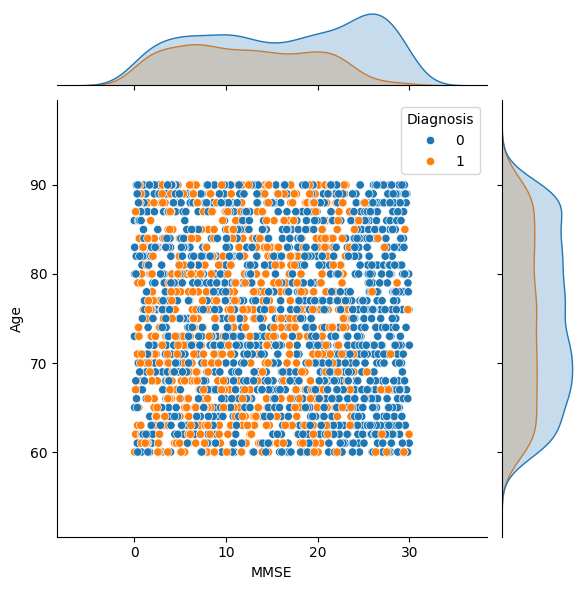

In [ ]:
sns.jointplot(data=df, y="Age", x="MMSE", hue="Diagnosis" ,kind="scatter")

**Obs:**
- Pacientes com Alzheimer possuem dificuldades de atingir pontuações maiores que 25 no MMSE.
- A idade não parece influenciar no MMSE

### Pacientes com Alzheimer apresentam escores mais baixos de ADL ou FunctionalAssessment?

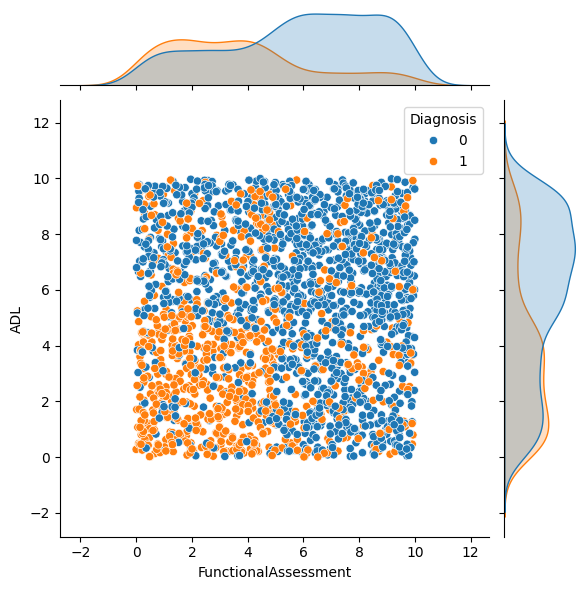

In [ ]:
sns.jointplot(data=df, y="ADL", x="FunctionalAssessment", hue="Diagnosis", kind="scatter")

**Obs**:
- Pode-se perceber um agrupamento de pacientes com diagnóstico positivo quando ADL<6 e Functional Assessment <6.

### O nível de escolaridade influencia os escores de MMSE?

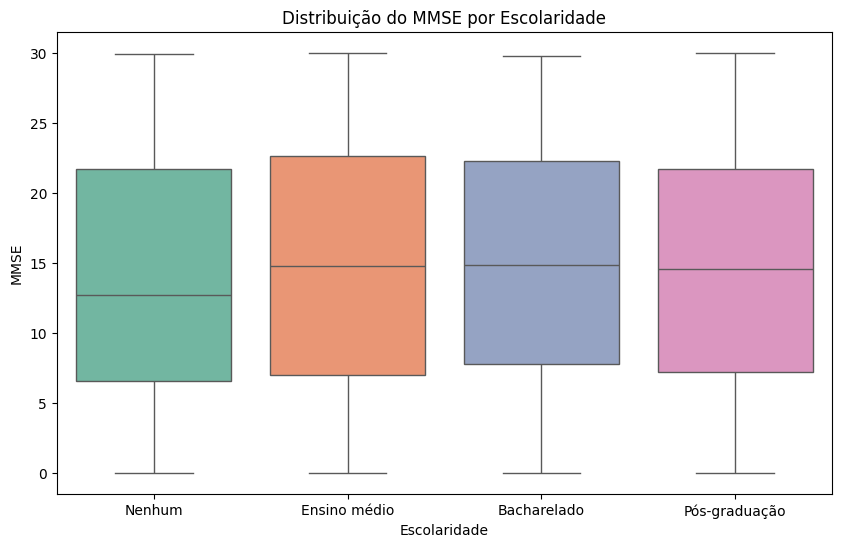

In [ ]:
box_plot(
    _df=df,
    x='EducationLevel',
    y='MMSE',
    title='Distribuição do MMSE por Escolaridade',
    ax=plt.gca(),
    xticks=["Nenhum", "Ensino médio", "Bacharelado", "Pós-graduação"],
    xlabel='Escolaridade',
)

**Obs:**
- O MMSE não parece ser influenciado pela escolaridade.
- Apenas quem não teve nenhuma das outras escolaridades mostrou uma mediana menor.

### Como as reclamações de memória e problemas comportamentais estão associados ao Alzheimer?

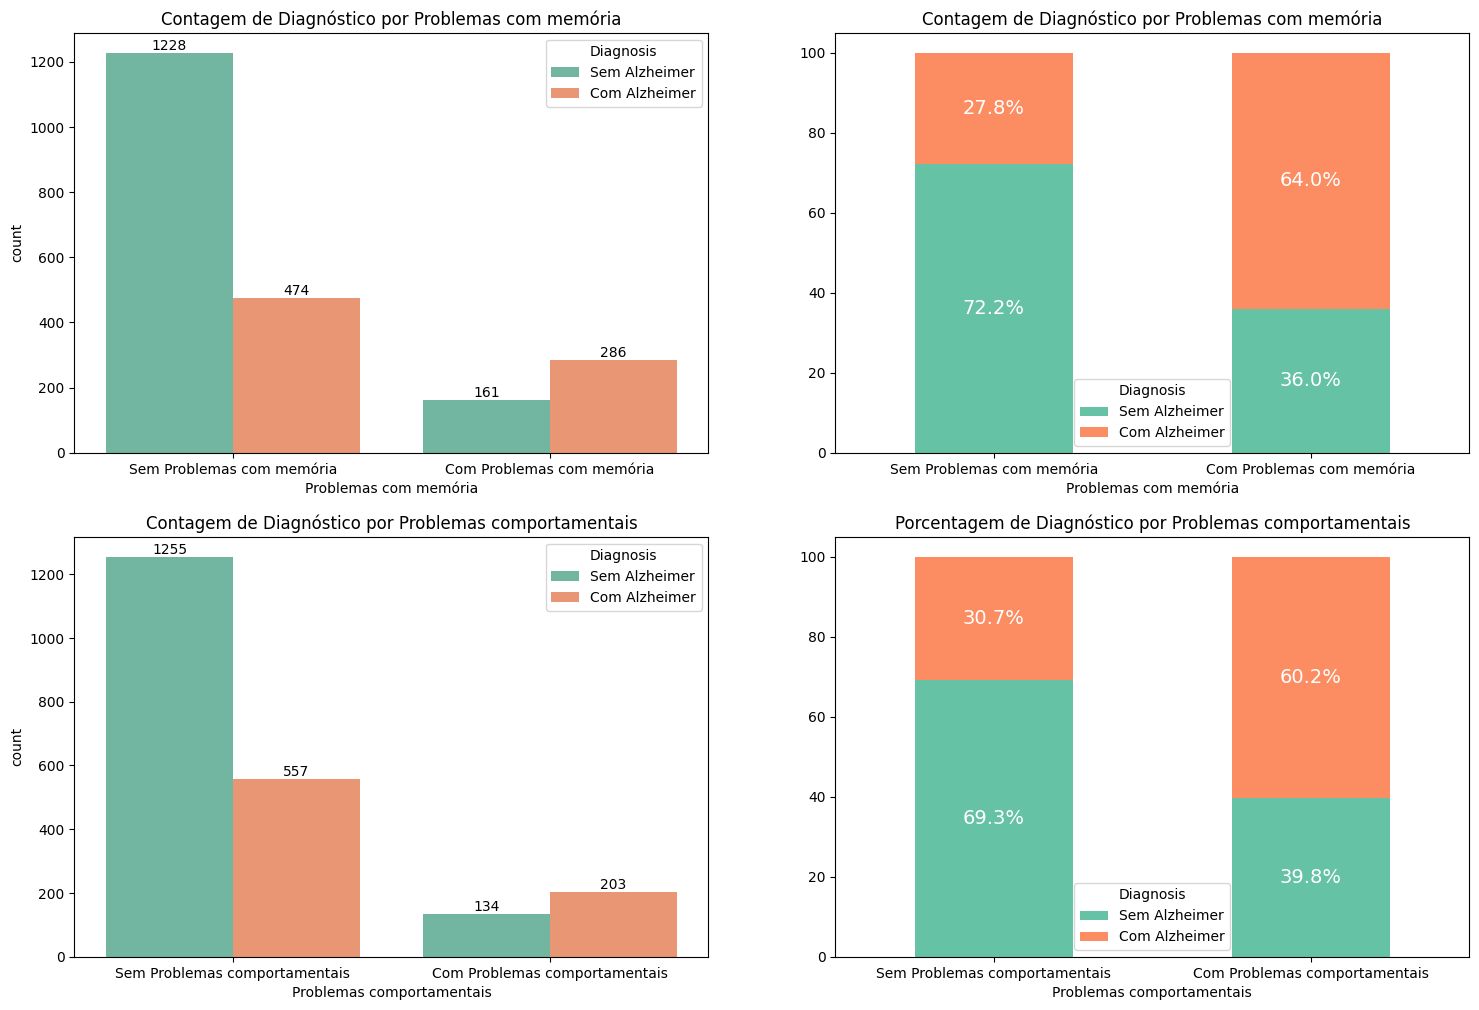

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))

count_plot(
    _df=df,
    x='MemoryComplaints',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Problemas com memória',
    xlabel='Problemas com memória',
    xticks=['Sem Problemas com memória', 'Com Problemas com memória'],
    ax=ax[0,0]
)

proportion_plot(
    _df=df,
    x='MemoryComplaints',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Problemas com memória',
    xlabel='Problemas com memória',
    xticks=['Sem Problemas com memória', 'Com Problemas com memória'],
    ax=ax[0,1]
)

count_plot(
    _df=df,
    x='BehavioralProblems',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Problemas comportamentais',
    xlabel='Problemas comportamentais',
    xticks=['Sem Problemas comportamentais', 'Com Problemas comportamentais'],
    ax=ax[1,0]
)

proportion_plot(
    _df=df,
    x='BehavioralProblems',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Problemas comportamentais',
    xlabel='Problemas comportamentais',
    xticks=['Sem Problemas comportamentais', 'Com Problemas comportamentais'],
    ax=ax[1,1]
)

### A presença de depressão ou histórico de lesão na cabeça está associada a menor desempenho cognitivo ou maior risco de Alzheimer?

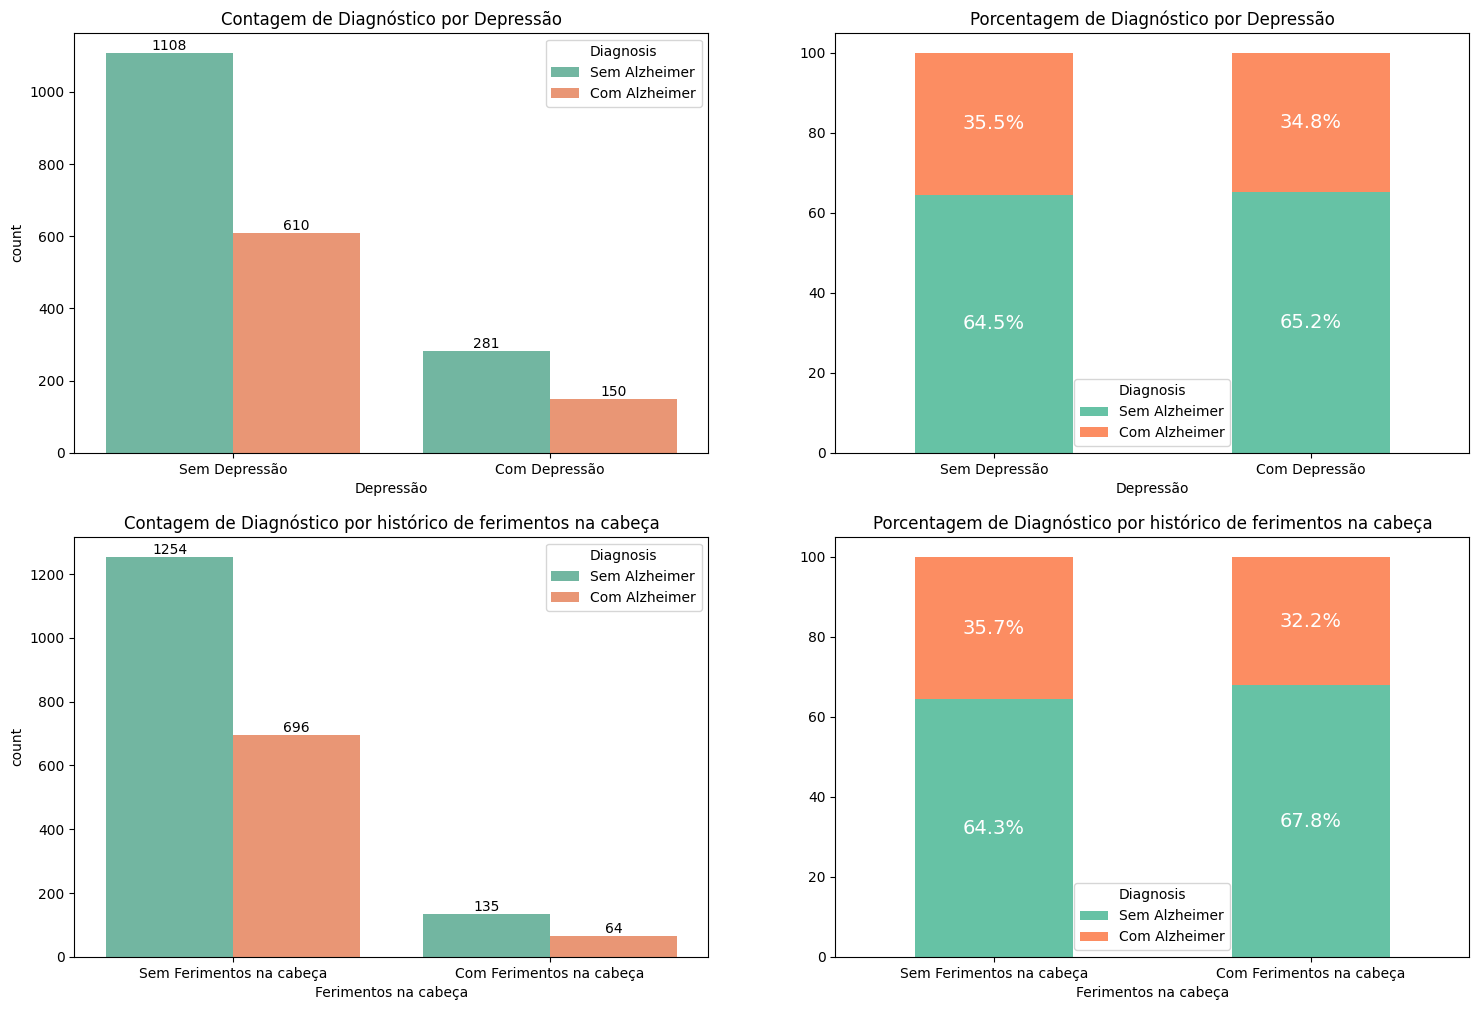

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))

count_plot(
    _df=df,
    x='Depression',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por Depressão',
    xlabel='Depressão',
    xticks=['Sem Depressão', 'Com Depressão'],
    ax=ax[0,0]
)

proportion_plot(
    _df=df,
    x='Depression',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por Depressão',
    xlabel='Depressão',
    xticks=['Sem Depressão', 'Com Depressão'],
    ax=ax[0,1]
)

count_plot(
    _df=df,
    x='HeadInjury',
    hue='Diagnosis',
    title='Contagem de Diagnóstico por histórico de ferimentos na cabeça',
    xlabel='Ferimentos na cabeça',
    xticks=['Sem Ferimentos na cabeça', 'Com Ferimentos na cabeça'],
    ax=ax[1,0]
)

proportion_plot(
    _df=df,
    x='HeadInjury',
    hue='Diagnosis',
    title='Porcentagem de Diagnóstico por histórico de ferimentos na cabeça',
    xlabel='Ferimentos na cabeça',
    xticks=['Sem Ferimentos na cabeça', 'Com Ferimentos na cabeça'],
    ax=ax[1,1]
)